# Components of a Neural Network
- Input Layer
- Hidden Layer
- Output Layer
- Activation Function
- Loss Function
- Gradient Descent
- Executing Gradient Descent
- Monitoring Bias/Variance
- Hyper parameter optimization

Note: DNNs have more than 2 hidden layers.

---------------

In [1]:
import tensorflow as tf
import numpy as np

try:
    import matplotlib.pyplot as plt
    %matplotlib inline
except:
    pass

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Cost (Loss/Error) Function
- Calculate the distance between labels and predictions
- Used to calculate direction of the gradient descent.
- Error function should be differentiable.
- Error function should be continuous.

There are various error functions and should be chosen according to the situation

### Error Function (Loglikelihood Cross-entropy)

$
\begin{align}
Error(model, dataset) = -\frac{1}{N}\sum_{i=0}^{N} \sum_{j=0}^{M} y^{(i)}_j * ln(\hat y^{(i)}_j) \\
\end{align}
$

**Questions**
- Are there other error functions than this one 

Justification for deriving the **error function** is given below.

#### Error Count
- Count number of errors
- Problems
  - Cost function is discrete, it's difficult for the gradient descent to work in small steps
<img src="DescreetError.png" width="200px"> 

#### Log Loss Function
- Estimate error based on distance between labels and predictions
  - Hence, larger penalty will be assigned for miss predictions and smaller penalty for better predictions

#### Maximum Likelihood

- [Udacity Lecture for likelihood](https://classroom.udacity.com/nanodegrees/nd889/parts/16cf5df5-73f0-4afa-93a9-de5974257236/modules/6124bd95-dec2-44f9-bf3b-498ea57699c7/lessons/47f6c25c-7749-4a02-b807-7a5b37f362e8/concepts/32704510-a70c-4a9b-a2c6-77ccdd389c0c)
- [Udacity Lecture for log likelihood resoning](https://classroom.udacity.com/nanodegrees/nd889/parts/16cf5df5-73f0-4afa-93a9-de5974257236/modules/6124bd95-dec2-44f9-bf3b-498ea57699c7/lessons/47f6c25c-7749-4a02-b807-7a5b37f362e8/concepts/2098790c-e2ce-4c0e-9e39-326bf189b417)
- Likelihood is probability for accuracy of the predictions.
   - Predictions are given as probabilities for being class 1 -> ŷ
   - Labels are given as 1 or 0 (since this is the binary-class) -> y
   
   $$Likelihood = \prod_{n=0}^{N} y_n * \hat y_n + (1 - y_n) * (1 - \hat y_n)$$
   ----- or ----
   $$Likelihood = \prod_{n=0}^{N} {\hat y_n}^{y_n} * {(1 - \hat y_n)}^{(1 - y_n)}$$
   
- Likelihood is difficult to work with, since product of probabilities get very small 
(product of fractions gets small exponetially)

#### Cross-Entropy

$$Crossentropy = -\sum_{i=0}^{N} ln(y^i_{label} * y^i_{pred}) + ln((1 - y^i_{label}) * (1 - y^i_{pred}))$$

- **Log (ln)** is used to convert products in the likelihood into summations.
- **Negative** is used since likelihood is a probability (0 < p < 1), therefore log value is a minus.


In [56]:
# example in udacity lecture worked out

y_labels = tf.constant([0., 1., 0., 1.]) # class labels 
y_pred = tf.constant([0.9, 0.6, 0.3, 0.2]) # probability of being 1

term_1 = tf.pow(y_pred, y_labels)
term_2 = tf.pow((1-y_pred), (1-y_labels))
likelihoods = term_1 * term_2
likelihood = tf.reduce_prod(likelihoods)

log_likelihoods = -tf.log(likelihoods)
cross_entropy = tf.reduce_sum(log_likelihoods)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    _y_labels, _y_preds = sess.run([y_labels, y_pred])
    _likelihood, _likelihoods, _term_1, _term_2 = sess.run([likelihood, likelihoods, term_1, term_2])
    _cross_entropy, _log_likelihoods = sess.run([cross_entropy, log_likelihoods])
    
    print(sess.run(tpow))

def flist(l):
    return ", ".join([f"{x:.1f}" for x in l])
print(f"Labels       : {flist(_y_labels)}")
print(f"Prediction   : {flist(_y_preds)} (predicted probability of being 1)")
print(f"Likelihoods  : {flist(_likelihoods)} (predicted probability of being labeled class)")
print(f"Likelihood   : {_likelihood:.4f}")
print(f"Cross-entropy: {_cross_entropy:.4f}")
    

[1.  0.6 1.  0.2]
Labels       : 0.0, 1.0, 0.0, 1.0
Prediction   : 0.9, 0.6, 0.3, 0.2 (predicted probability of being 1)
Likelihoods  : 0.1, 0.6, 0.7, 0.2 (predicted probability of being labeled class)
Likelihood   : 0.0084
Cross-entropy: 4.7795


#### Cross-Entropy (Multi-class)

$
\begin{align}
Crossentropy = -\sum_{i=0}^{N} \sum_{j=0}^{M} y^{(i)}_j * ln(\hat y^{(i)}_j) \\
\end{align}
$
- Legend
  - i: number of data points (1 to N)
  - j: number of classes (1 to M)
  - y: labels
  - ŷ: predictions


#### Error Function

$
\begin{align}
Error(model, dataset) = -\frac{1}{N}\sum_{i=0}^{N} \sum_{j=0}^{M} y^{(i)}_j * ln(\hat y^{(i)}_j) \\
\end{align}
$

- Legend
  - i: number of data points (1 to N)
  - j: number of classes (1 to M)
  - y: labels
  - ŷ: predictions


## Tensorflow Loss Functions

- [absolute difference](https://www.tensorflow.org/api_docs/python/tf/losses/absolute_difference): Average difference between two vectors
- [sigmoid_cross_entropy_loss](https://www.tensorflow.org/api_docs/python/tf/losses/sigmoid_cross_entropy): Take *logits* for *y_pred*. i.e. values from the output layer before calculating probabilities; in other words, **before applying *sigmoid* function**.

In [48]:
# example in udacity lecture worked out

y_labels = tf.constant([0., 1., 0., 1.]) # class labels 
y_pred = tf.constant([0.9, 0.6, 0.3, 0.2]) # probability of being 1

log_loss = tf.losses.log_loss([1.1], [1])
mse_loss = tf.losses.mean_squared_error([1, 2], [2, 4])
absolute_loss = tf.losses.absolute_difference([1, -2], [2, 2])
sigmoid_cross_entropy_loss = tf.losses.sigmoid_cross_entropy(y_labels, y_pred)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    print("Absolute difference")
    _absolute_loss = sess.run(absolute_loss)
    print("Numpy: ", np.abs(np.average(np.array([1, -2]) - np.array([2, 2]))))
    print("Tensorflow", _absolute_loss)
    print()
    print("Log Loss: ", sess.run(log_loss))
    print("MSE Loss: ", sess.run(mse_loss))
    print("Sigmoid Cross Entropy Loss: ", sess.run(sigmoid_cross_entropy_loss))

Absolute difference
Numpy:  2.5
Tensorflow 2.5

Log Loss:  -1.6118101
MSE Loss:  2.5
Sigmoid Cross Entropy Loss:  0.782784


## Activation Functions

### Sigmoid Function
$$sigmoid(x) = \dfrac{1}{1+e^{-x}}$$

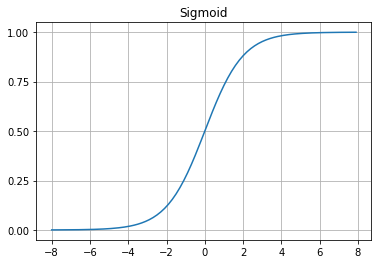

In [17]:
#x = tf.get_variable("X")
x = tf.range(-8, 8, 0.1)
y = tf.sigmoid(x)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    X, Y = sess.run([x, y])

plt.title("Sigmoid")
plt.plot(X, Y)
plt.yticks(np.arange(0, 1.1, 0.25))
plt.grid(True)

- Convert descrete prediction (0 or 1) to a continuous function. Continuous functions provide better estimates for the loss function.

**Usage**
- Activation function of the hidden layers.
  - Explain how Relu is better
- Activation function for the output layer in binary classification.
  - Explain how continous function is converted to descrete

### Softmax

$$Softmax(i)=\dfrac{e^{L_i}}{\sum_{i=1}^{N} e^{L_i}}$$ 
`Where`<br>
`- i: class`<br>
`- L_i: Linear fuction score for class i`

- Softmax converts score given to each class into probabilities that sums upto 1.
- Used as activation function for output layer in multi-class classification

In [36]:
#x = tf.get_variable("X")
x = tf.placeholder(tf.float32)
y = tf.nn.softmax(x)

sum = tf.reduce_sum(y)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    Sum, X, Y = sess.run([sum, x, y], feed_dict={x: [2, 3, 1]})

print(f"Scores:                {X}")
print(f"Softmax Probabilities: {Y}")
print(f"Sum:                   {Sum}")

Scores:                [2. 3. 1.]
Softmax Probabilities: [0.24472848 0.66524094 0.09003057]
Sum:                   1.0


# Gradient Descent
